<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armmijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


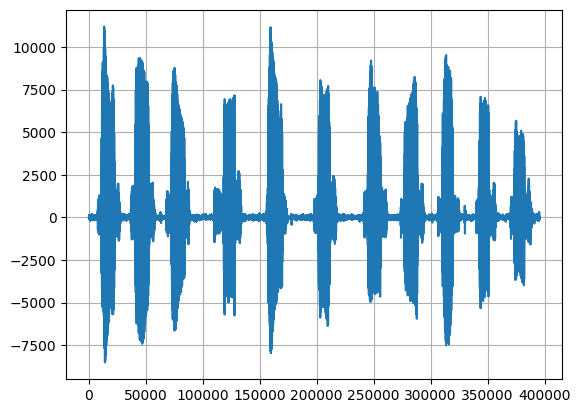

In [25]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np


# Lectura de archivo.wav
tasa_muestreo, datos = wavfile.read("Exercise2.7_adultmale_b_d2.wav")
tf = len(datos)/tasa_muestreo
time = np.linspace(0,tf,len(datos))
#datos=np.sin(2*np.pi*1000*time) + np.sin(2*np.pi*2000*time)



# Aplicacion FFT
datos_fft = fft(datos)
frecs = fftfreq(len(datos),1/tasa_muestreo)

# Graficos

# FFT de la señal de audio
plt.figure(1)
plt.plot(frecs, 2.0/len(datos) * np.abs(datos_fft))
plt.title('FFT de la señal de audio')
plt.xlim(0,5000)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()

# Señal de audio
plt.figure(2)
plt.plot(datos)
plt.grid()
plt.show()

## 2. Obtén el espectrograma de tu señal de audio

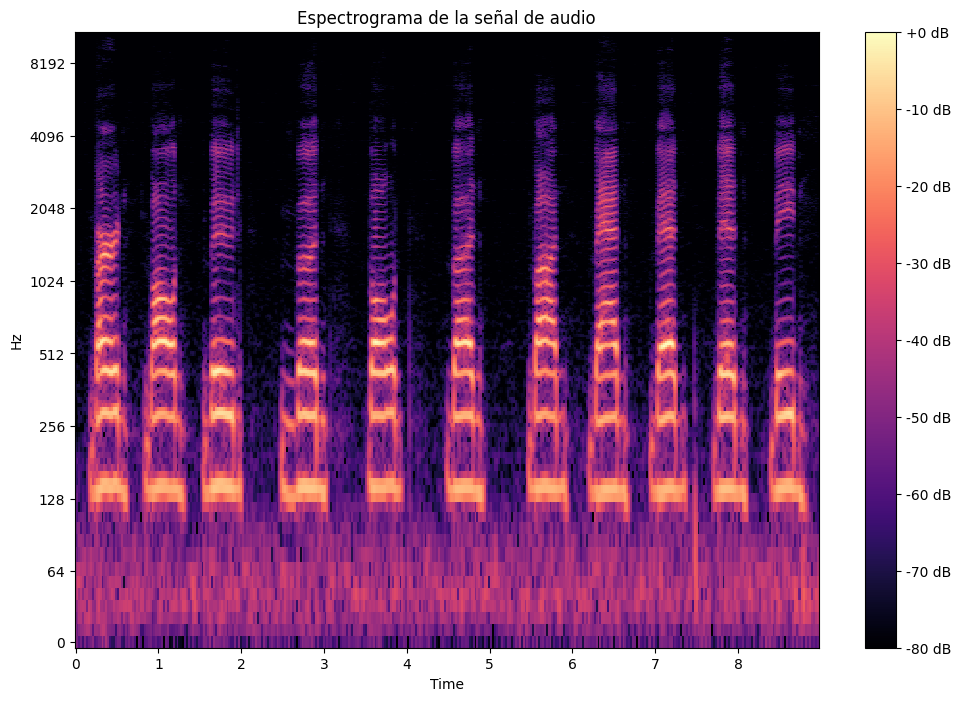

In [9]:
import librosa

# Carga del archivo de audio utilizando libreria librosa
x, sr = librosa.load("Exercise2.7_adultmale_b_d2.wav")
x_dB = librosa.amplitude_to_db(x)

# Obtencion del espectograma
D = librosa.stft(x)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Mostrar el espectrograma
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la señal de audio')
plt.show()


## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

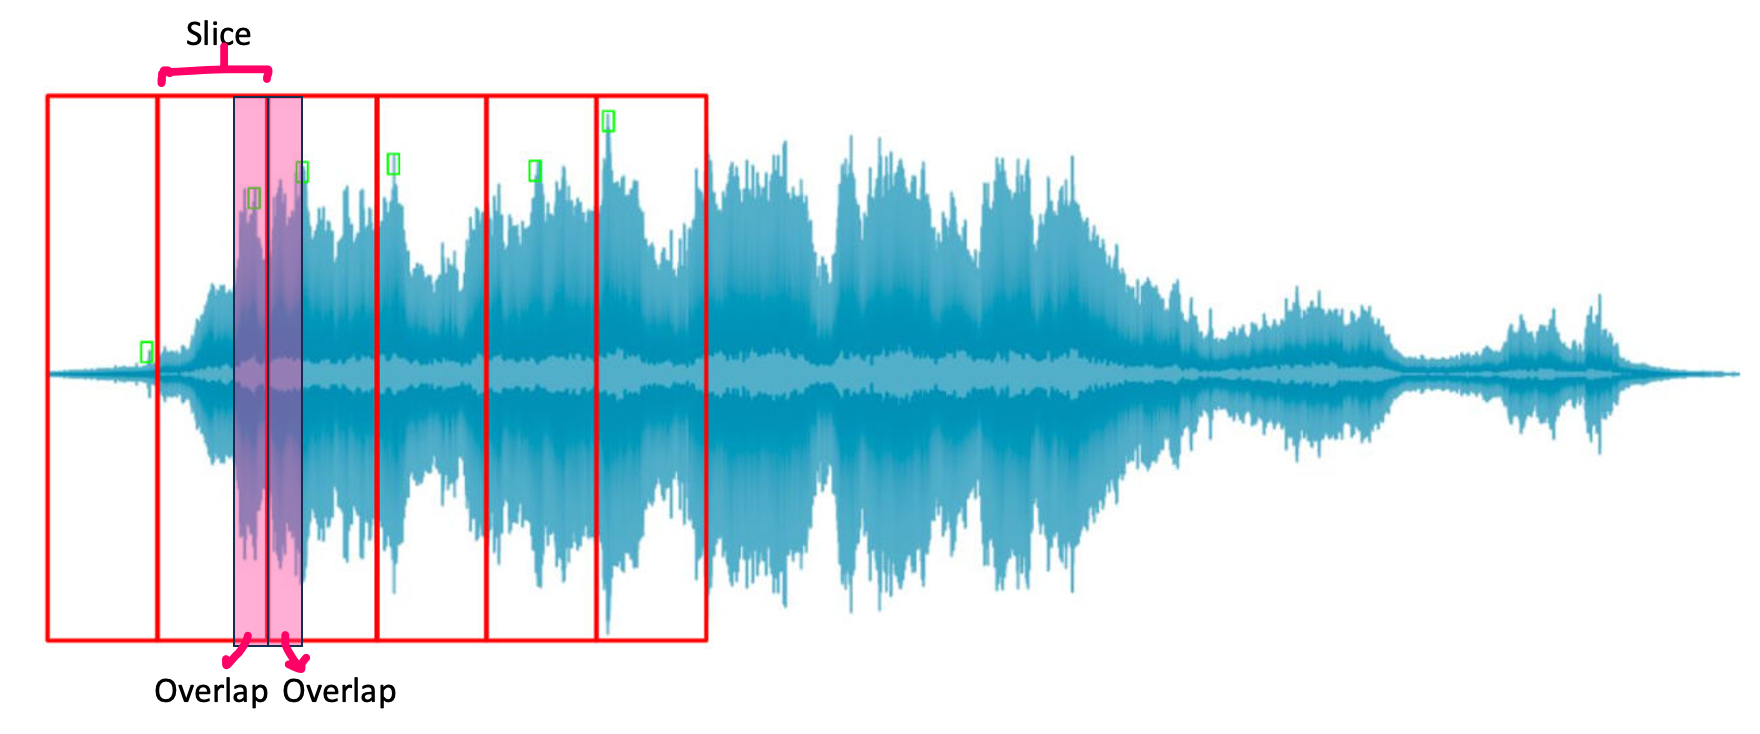

In [27]:
# n_segmentos = int(np.floor((len())))

import numpy as np

def fragment_audio(signal, slice_length, overlap):
    """
    Fragmenta una señal de audio en segmentos con un overlap ajustable.

    Args:
    - signal: numpy array. La señal de audio.
    - slice_length: int. Longitud temporal de cada slice en muestras.
    - overlap: int. Número de muestras que constituyen el overlap en cada lado de cada slice.

    Returns:
    - fragments: lista de numpy arrays. Lista de los segmentos fragmentados.
    """
    num_samples = len(signal)
    step = slice_length - overlap * 2  # Paso entre segmentos

    fragments = []
    start = 0
    while start < num_samples:
        end = min(start + slice_length, num_samples)
        fragment = signal[start:end]
        fragments.append(fragment)
        start += step

    return fragments


slice_length = 3000  # Longitud temporal de cada slice en muestras
overlap = 600  # Número de muestras de overlap en cada lado de cada slice

fragmentos = fragment_audio(datos,slice_length,overlap)
print(len(fragmentos))

220


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
